Mahalonobis Distance

In [1]:
import pandas as pd 
import numpy as np 
import math as mt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import LocalOutlierFactor
failure_data = r'C:\Users\Niranjan\Desktop\BISAG\machine failed\cleaned_data.csv'
#Use the path where the data is stored
dataset = pd.read_csv(failure_data)
df = dataset
df2 = pd.DataFrame(df)
df2["Date"] = df2['Date'].astype(str) + "  " + df2['Time'].astype(str)
#Combining date and time to convert it further into date time format
df2['Date']= pd.to_datetime(df2['Date'], format='%d-%m-%Y %H:%M:%S')
df2 = df2.drop(['Time'],axis = 1)
df3=df2
df2 = df2.set_index("Date")
#Set the index to the date
data = df2


In [6]:
from scipy.spatial.distance import mahalanobis
# Calculate the Mahalanobis distance
cov_matrix = np.cov(data.T)  # Calculate the covariance matrix

# Regularization to handle singular matrix
reg_cov_matrix = cov_matrix + 1e-8 * np.eye(cov_matrix.shape[0])

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(reg_cov_matrix)

# Calculate the Mahalanobis distance for each data point
mahalanobis_dist = []
mean_vector = data.mean().values  # Calculate the mean vector
for i in range(len(data)):
    data_point = data.iloc[i].values
    dist = mahalanobis(data_point, mean_vector, inv_cov_matrix)
    mahalanobis_dist.append(dist)

# Determine the threshold for anomaly detection
threshold = np.mean(mahalanobis_dist) +  4.8*np.std(mahalanobis_dist)  # Example: Threshold using mean + 3 standard deviations

# Classify data points as normal or anomalous
anomalies = np.array(mahalanobis_dist) > threshold
z = 0

print("Anomalies found:")
for i, anomaly in enumerate(anomalies):
    if anomaly:
        original_data_point = data.iloc[i]  # Retrieve the original data point
        index_value = data.index[i]  # Retrieve the index value
        print(f"{index_value}")
        #print(f"Data point {index_value} is an anomaly:")
        #z += 1
        #print(z)


Anomalies found:
2021-09-21 17:00:00
2021-09-21 18:00:00
2021-09-21 19:00:00
2021-09-21 20:00:00
2021-09-21 21:00:00
2021-09-21 22:00:00
2021-09-21 23:00:00
2021-09-22 00:00:00
2021-09-22 01:00:00
2021-09-22 03:00:00
2021-10-13 19:00:00
2021-10-13 20:00:00
2021-10-13 21:00:00
2021-10-13 22:00:00
2021-10-19 07:00:00
2022-06-19 02:00:00
2022-06-19 03:00:00
2022-06-22 00:00:00
2022-06-25 08:00:00
2022-06-25 09:00:00
2022-06-25 10:00:00
2022-06-25 11:00:00
2022-06-25 12:00:00
2022-06-25 13:00:00


Visualising the data to check for the anomalies

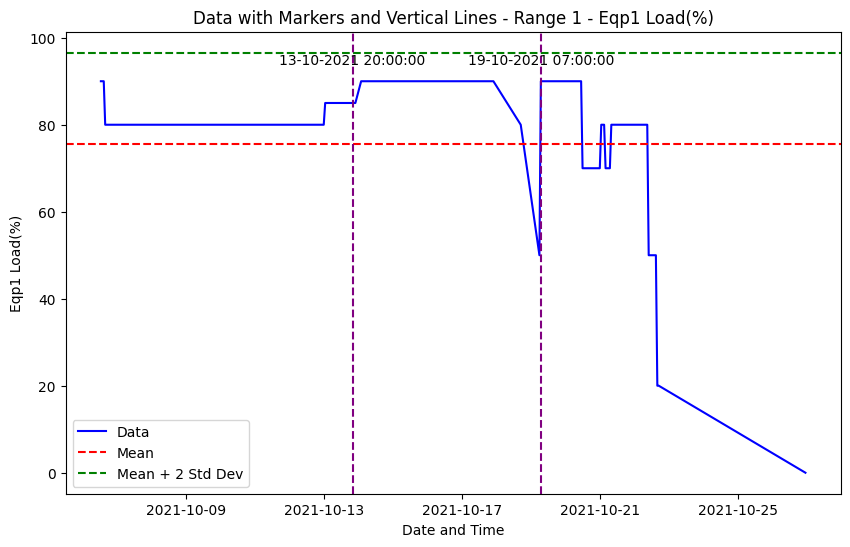

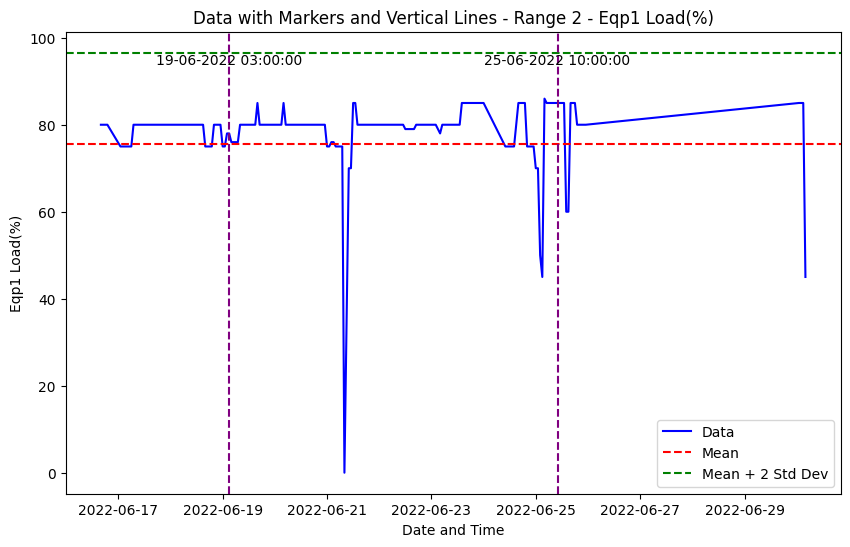

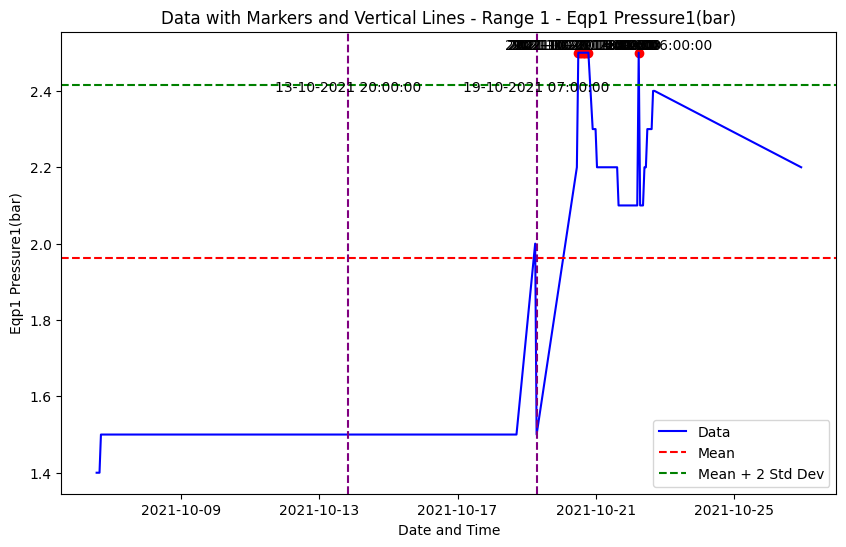

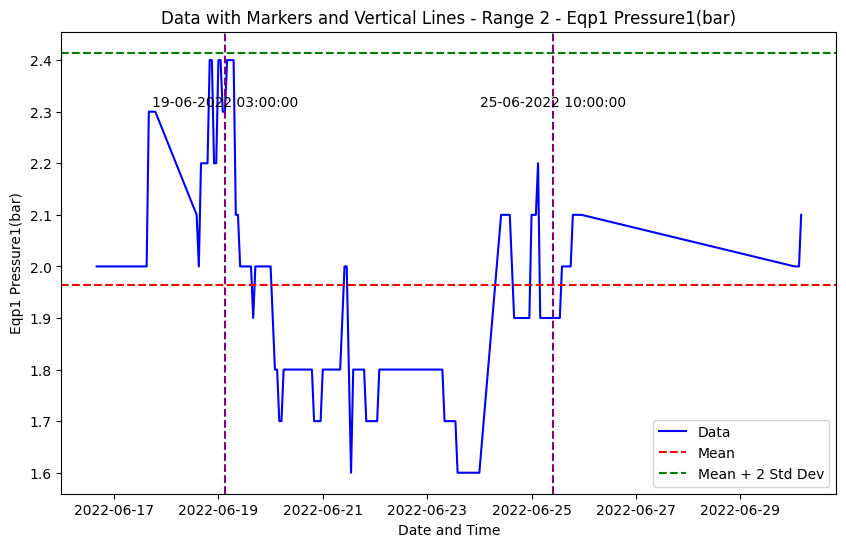

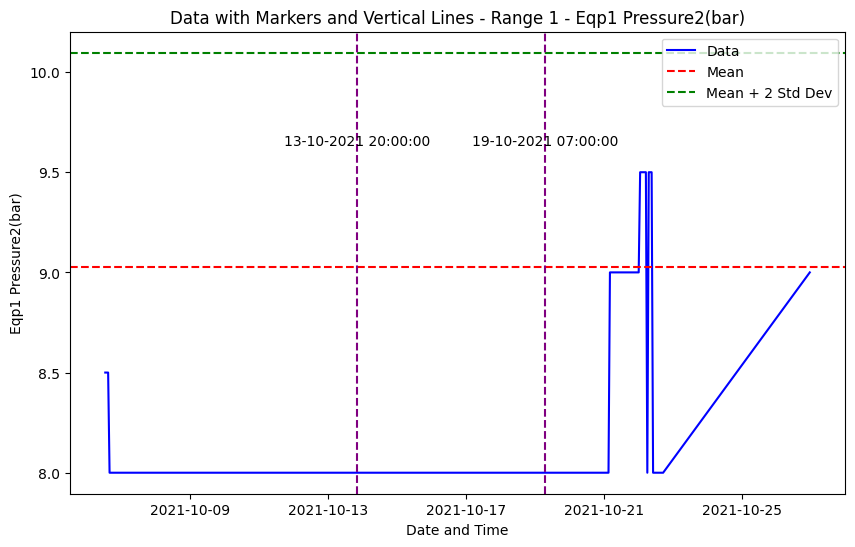

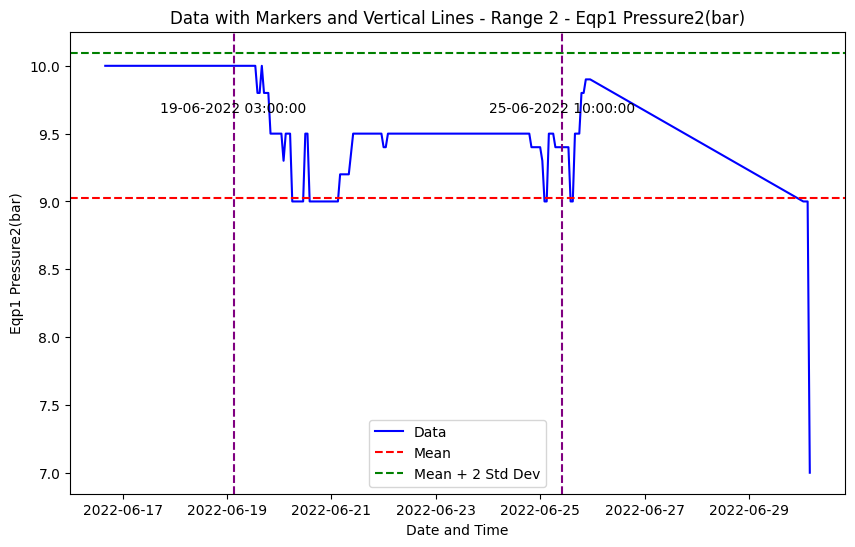

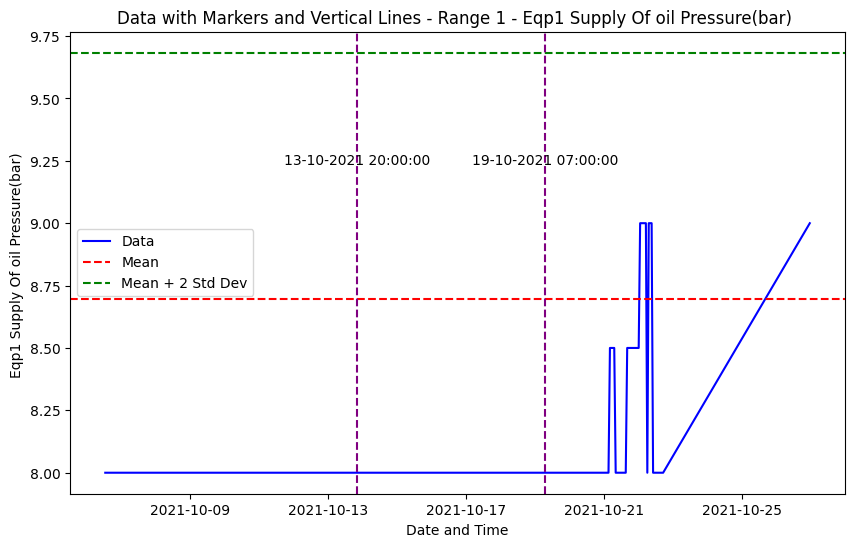

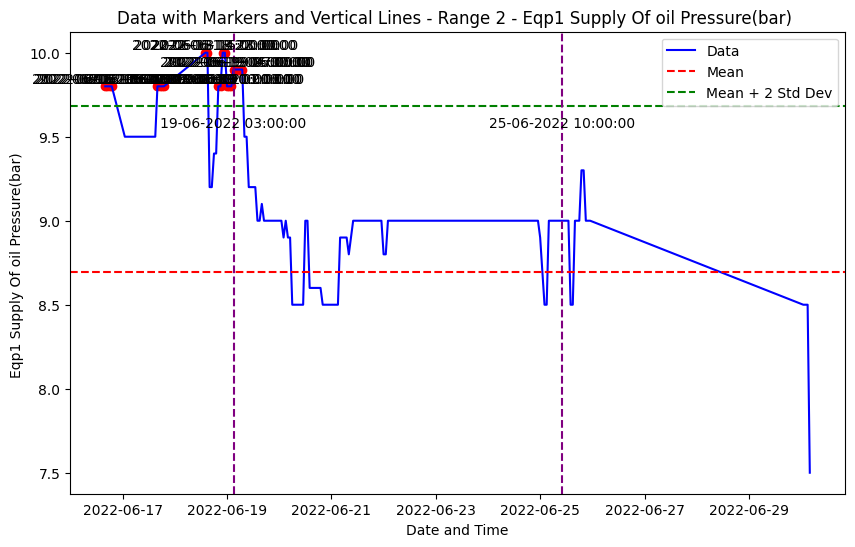

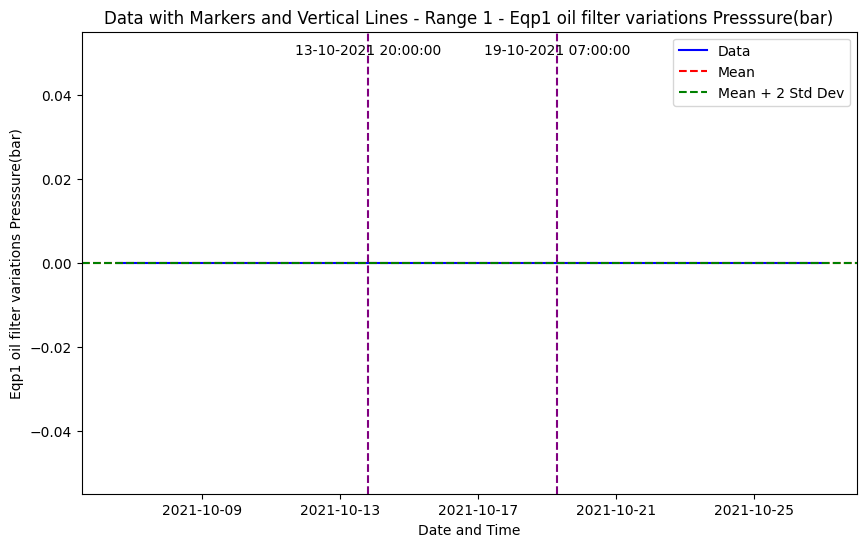

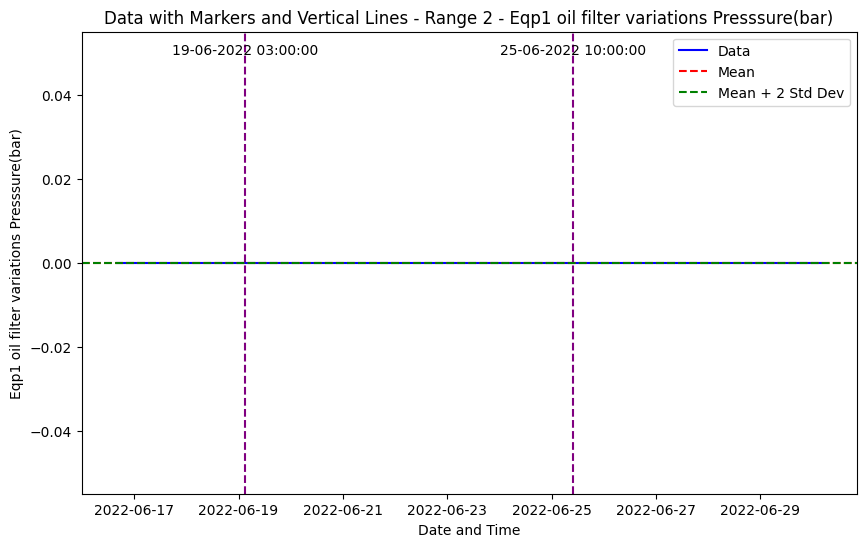

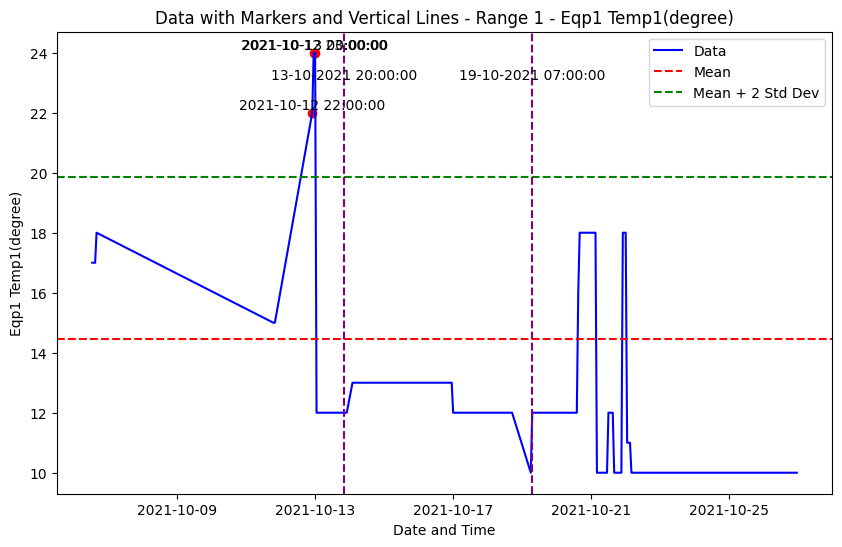

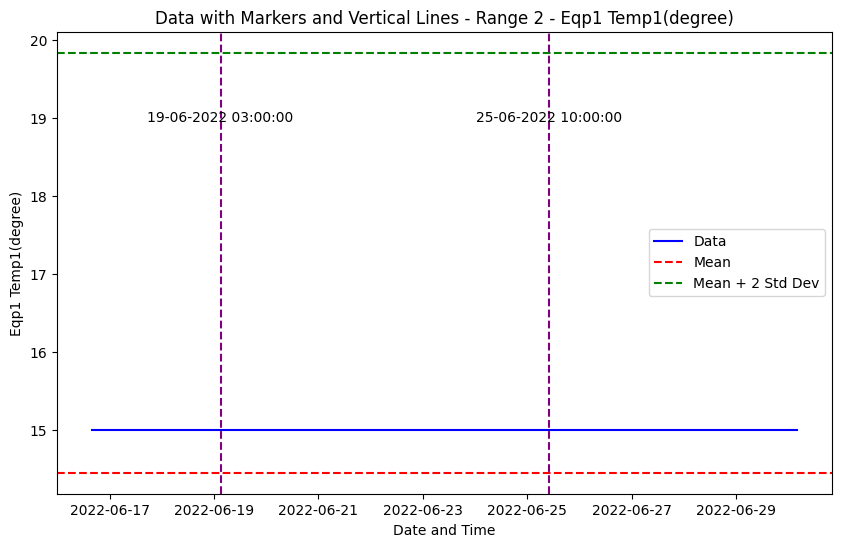

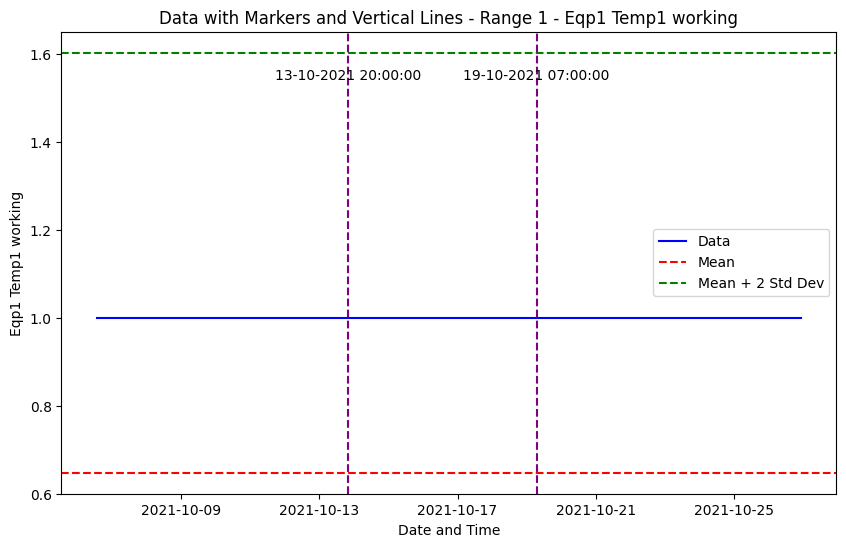

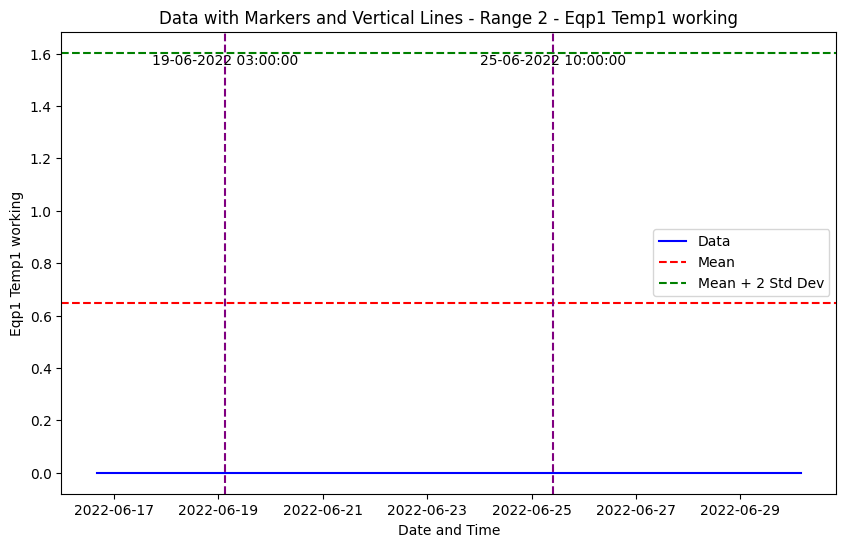

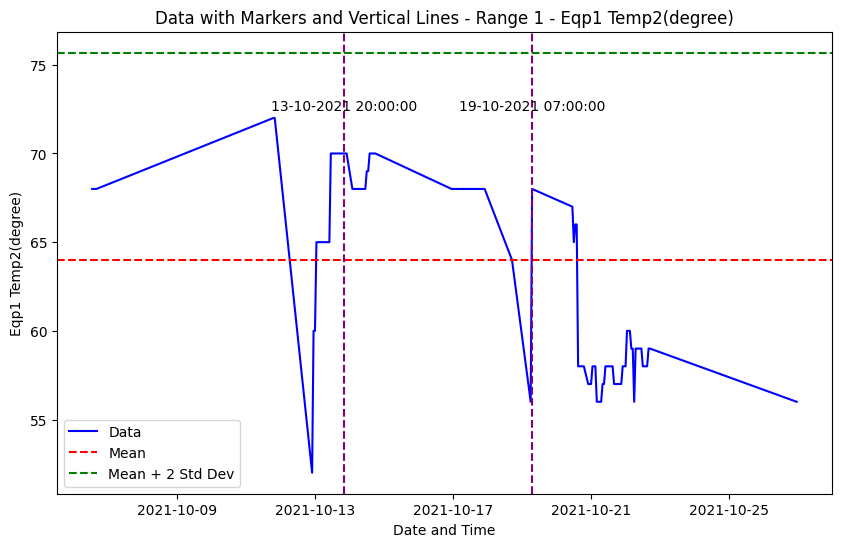

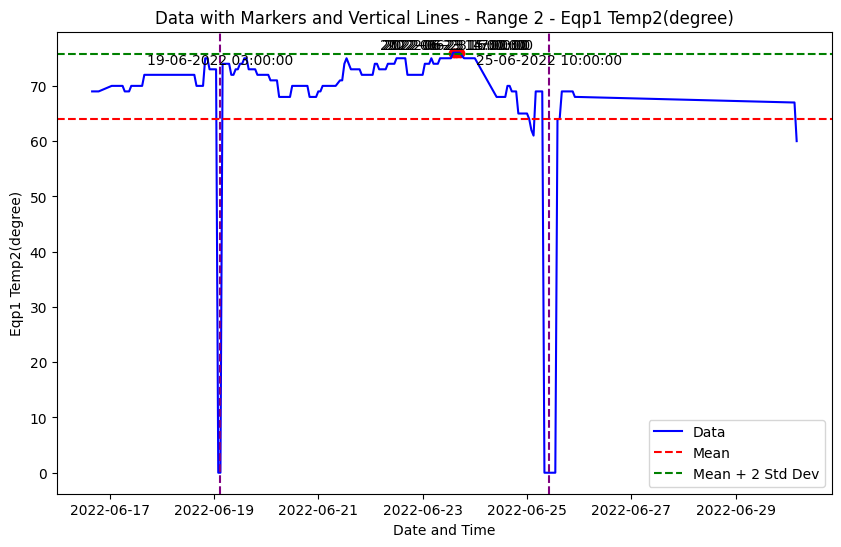

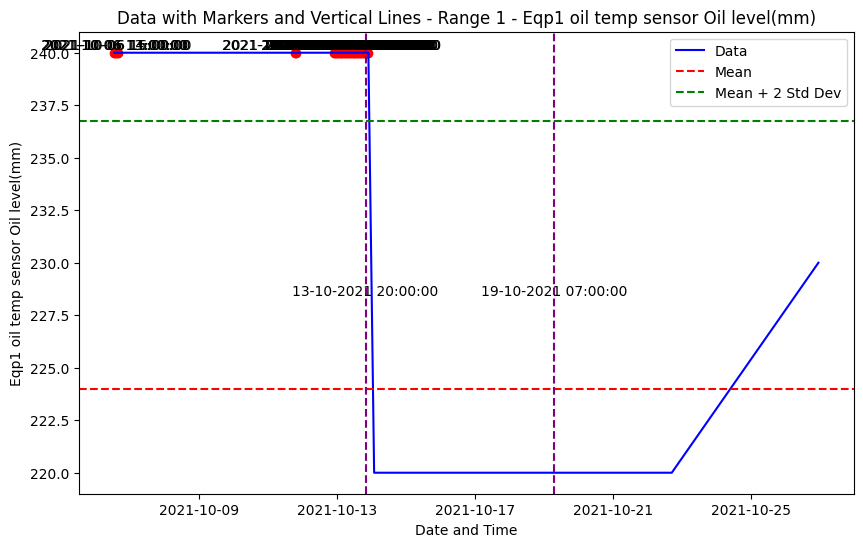

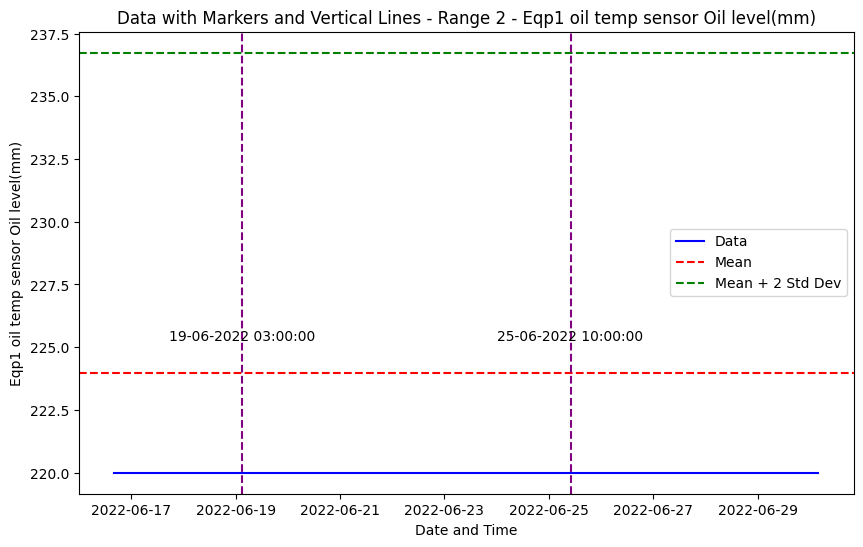

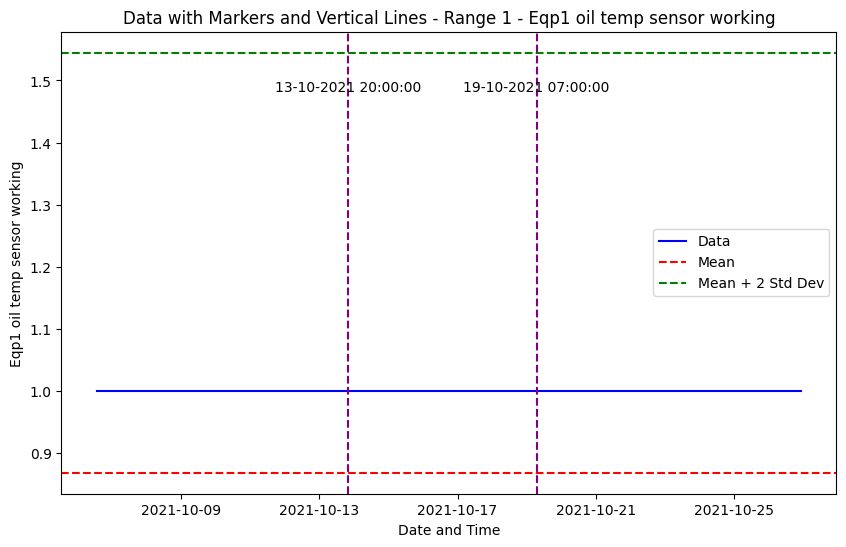

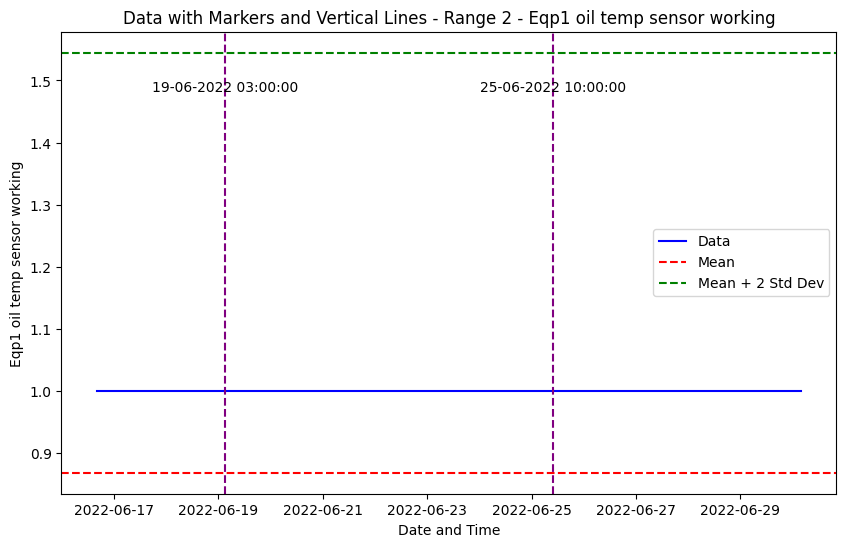

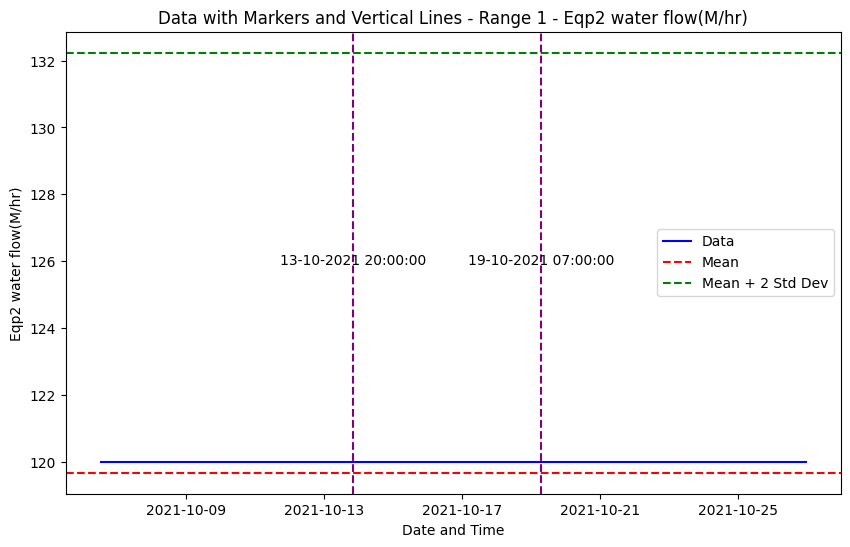

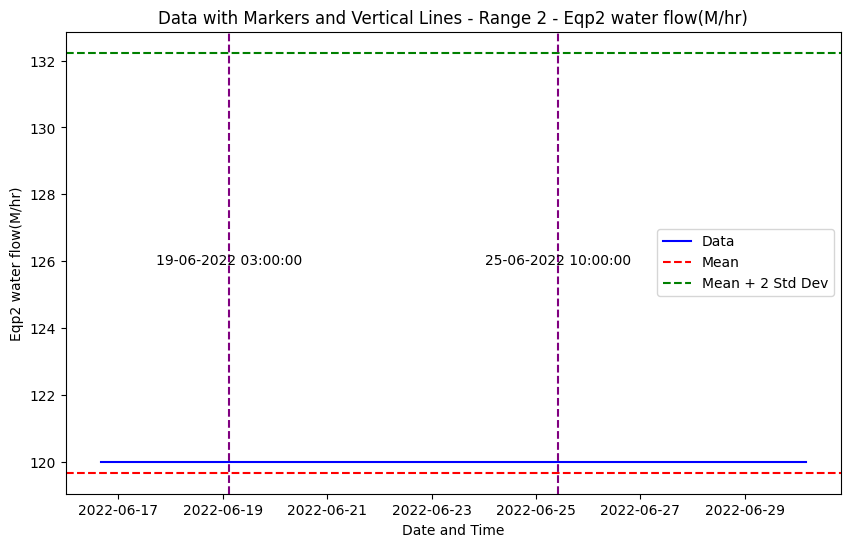

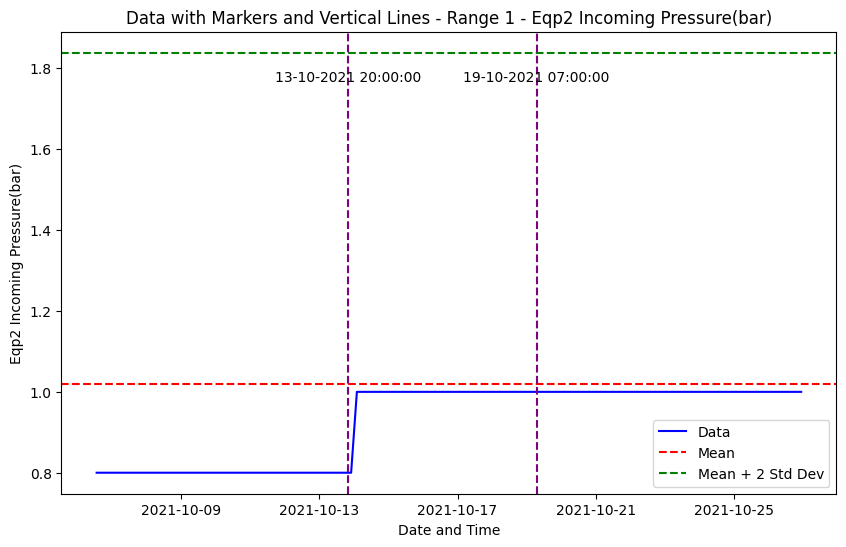

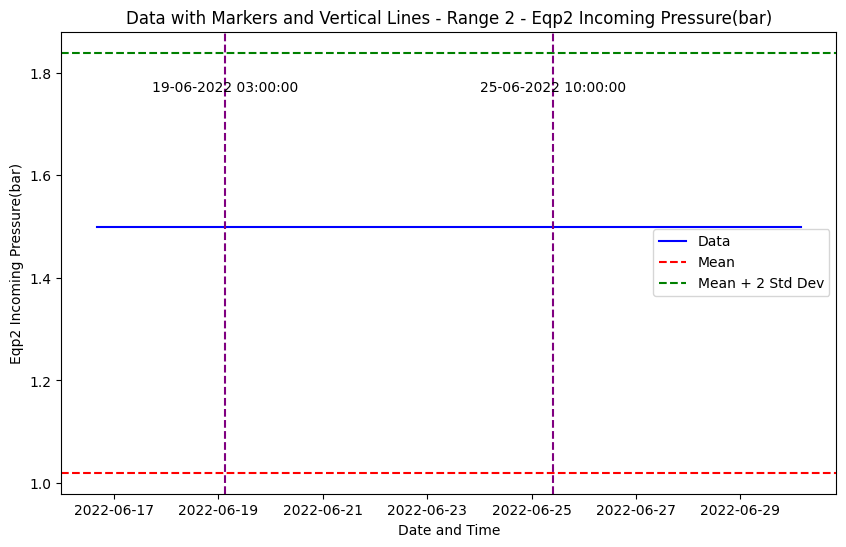

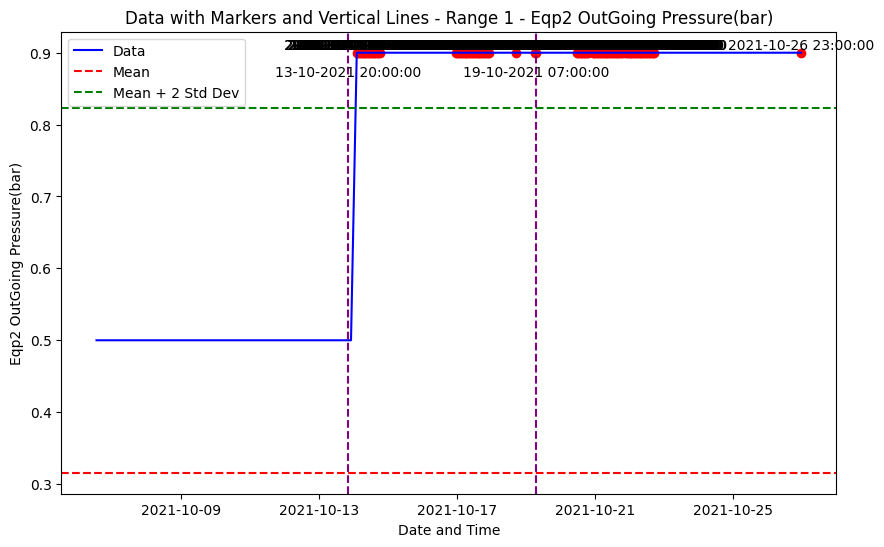

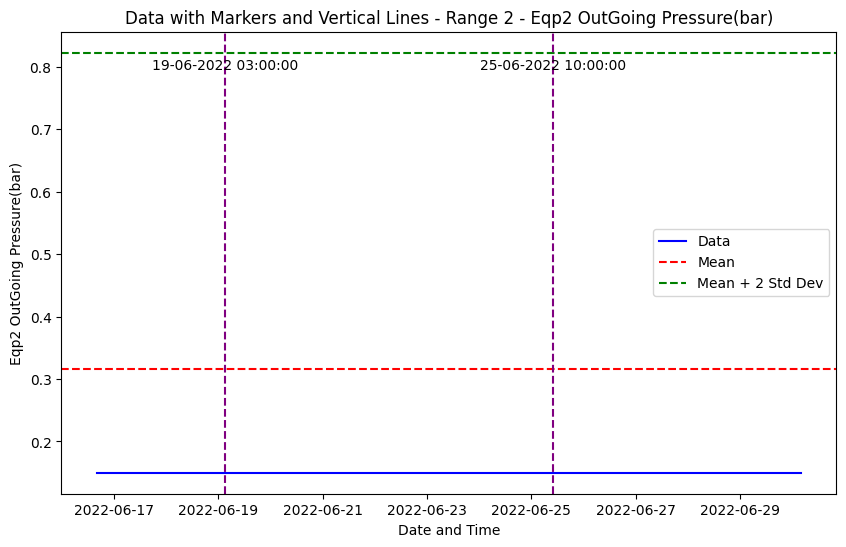

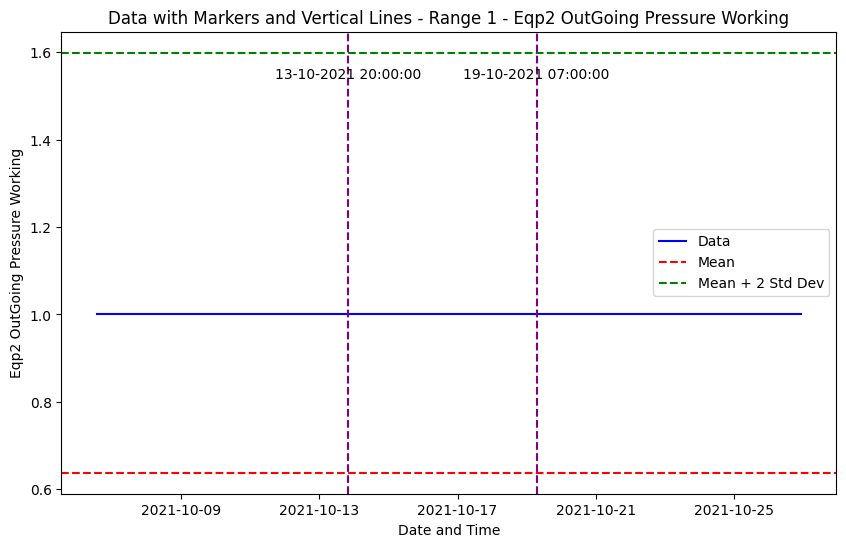

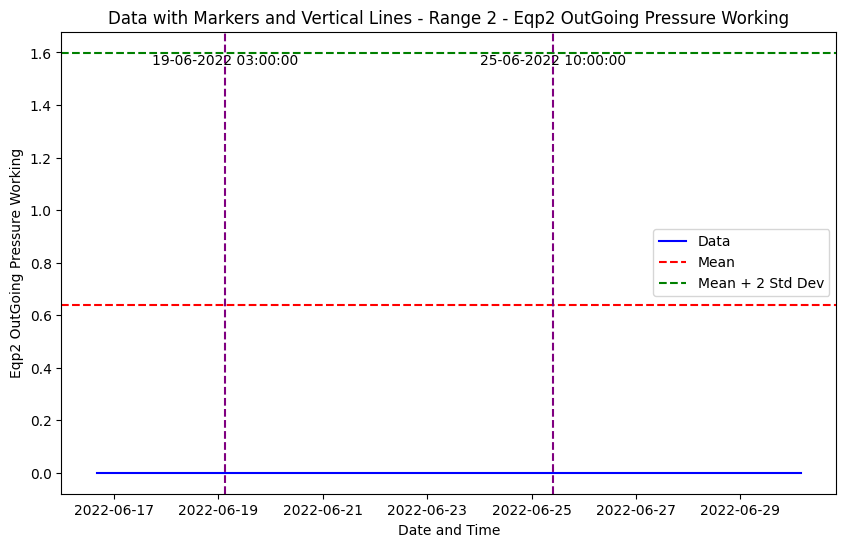

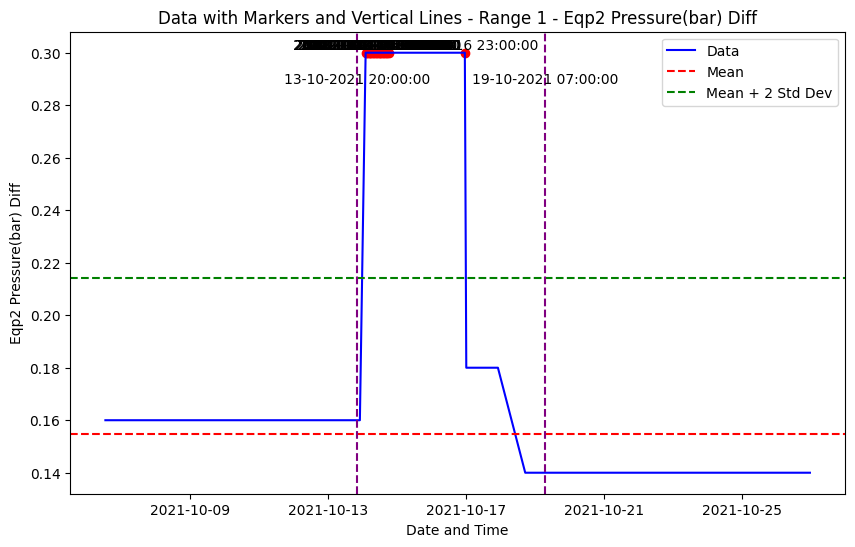

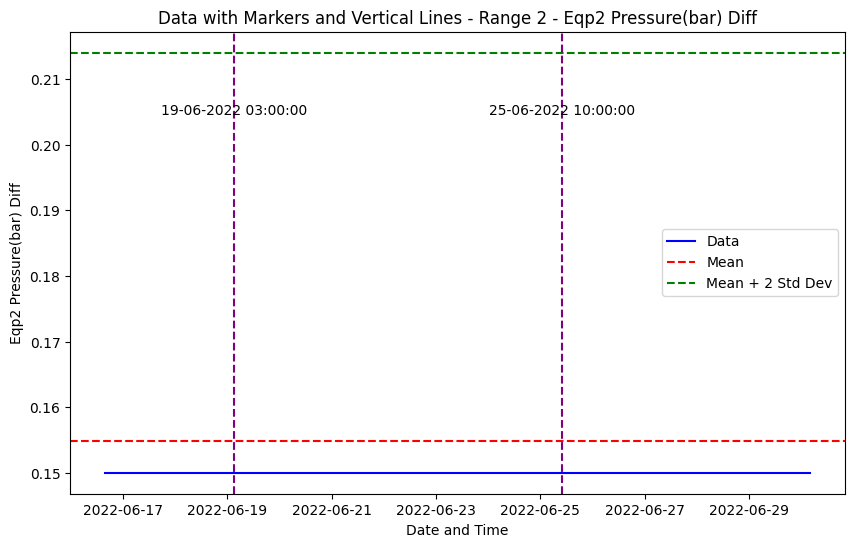

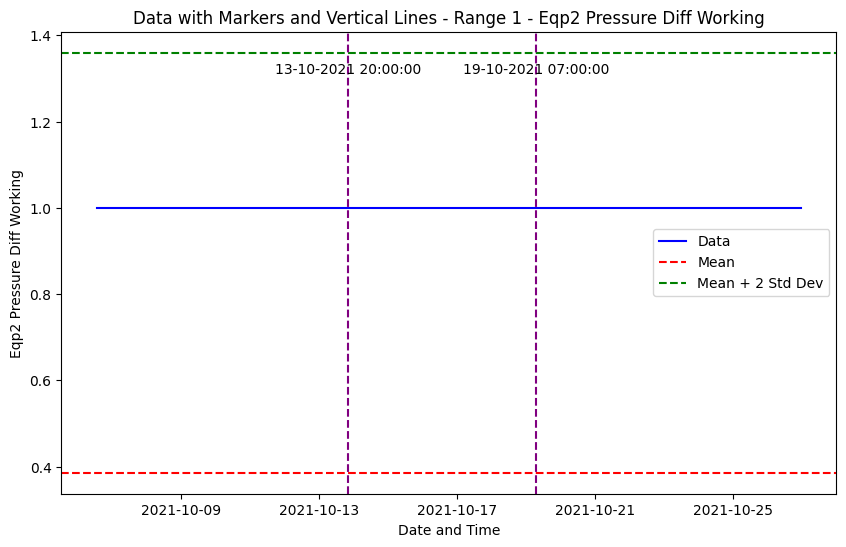

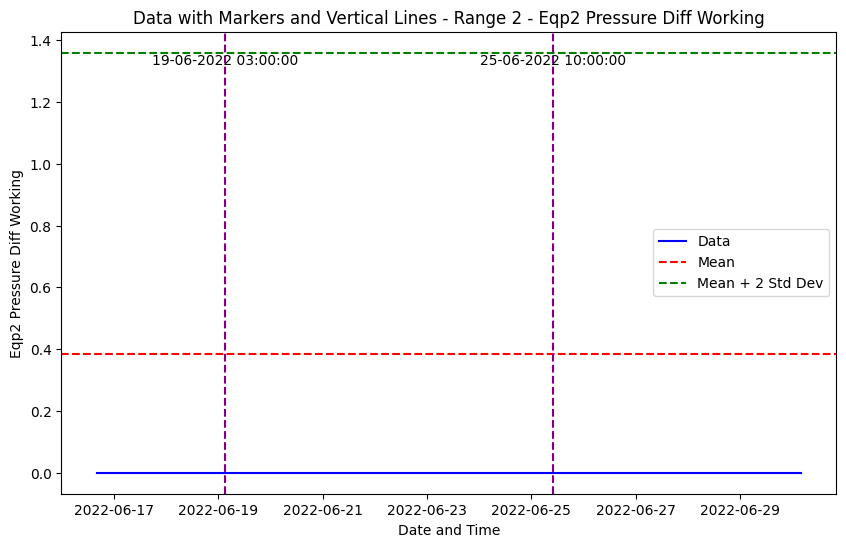

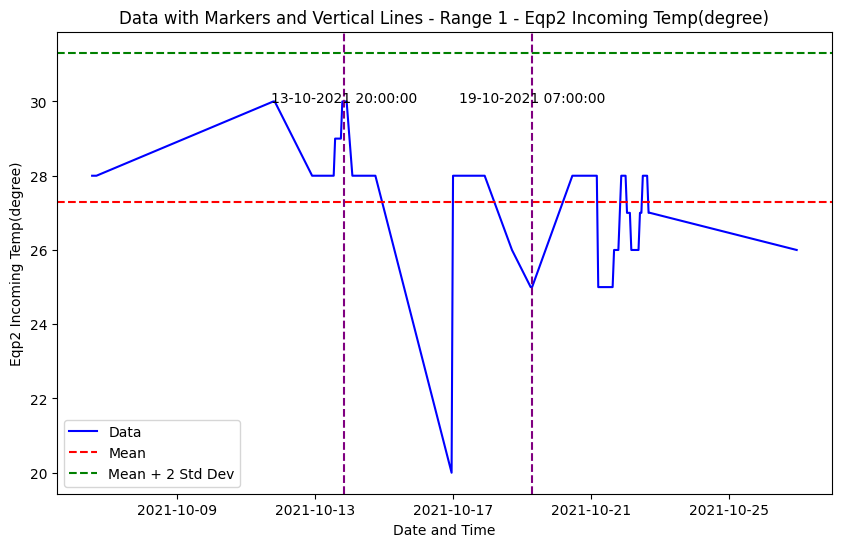

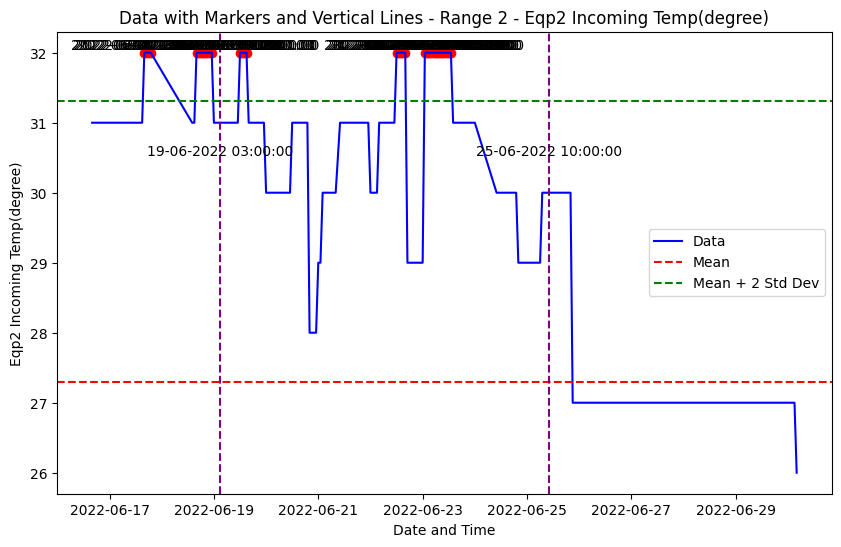

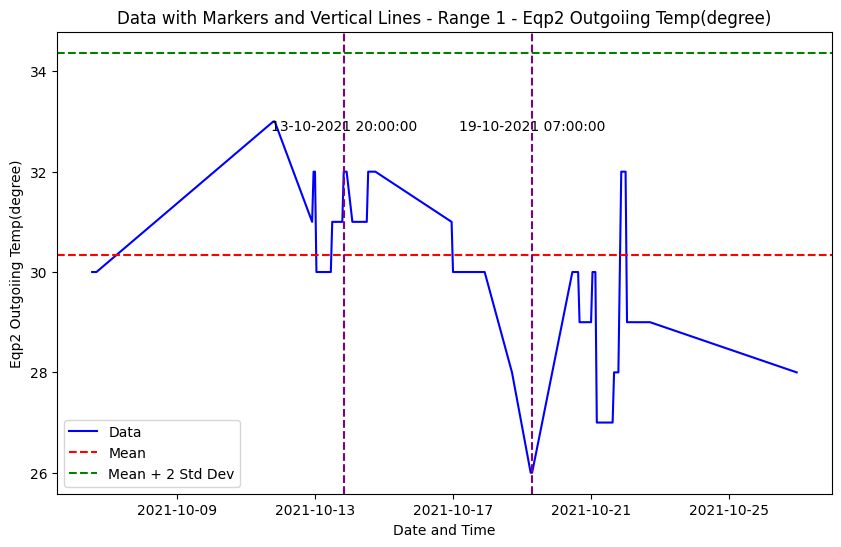

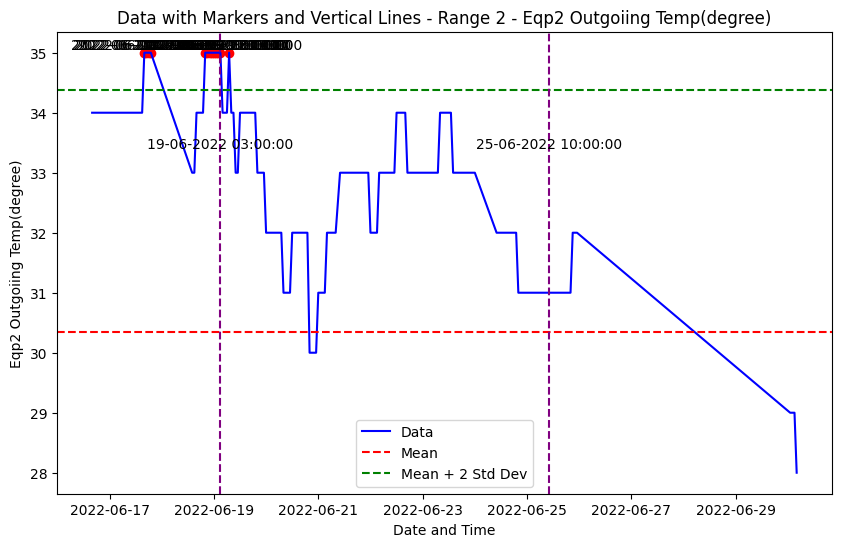

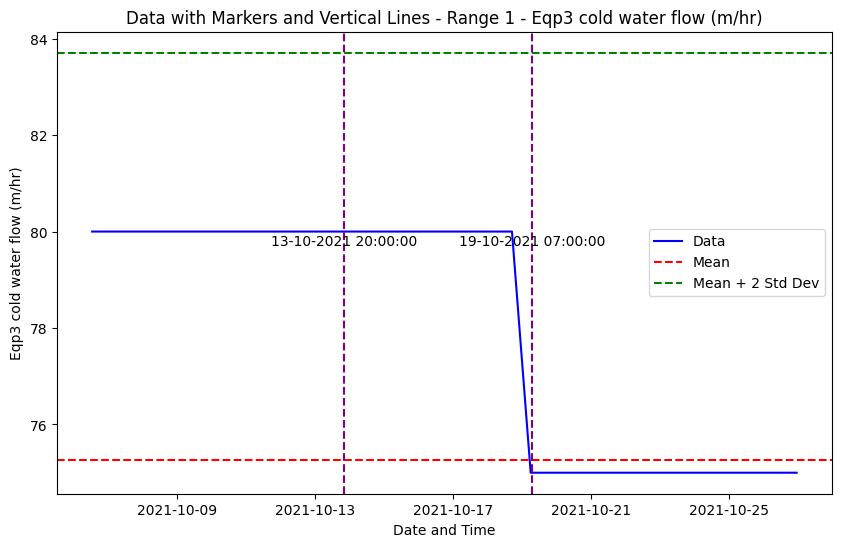

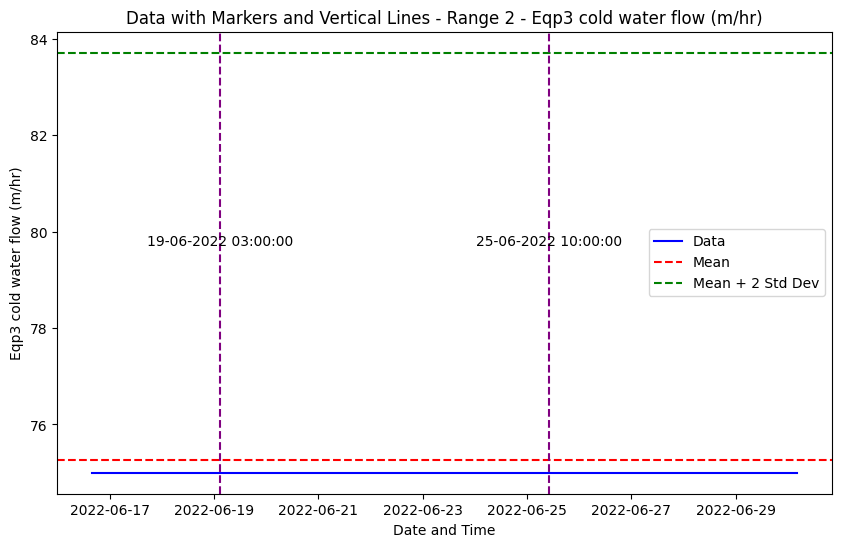

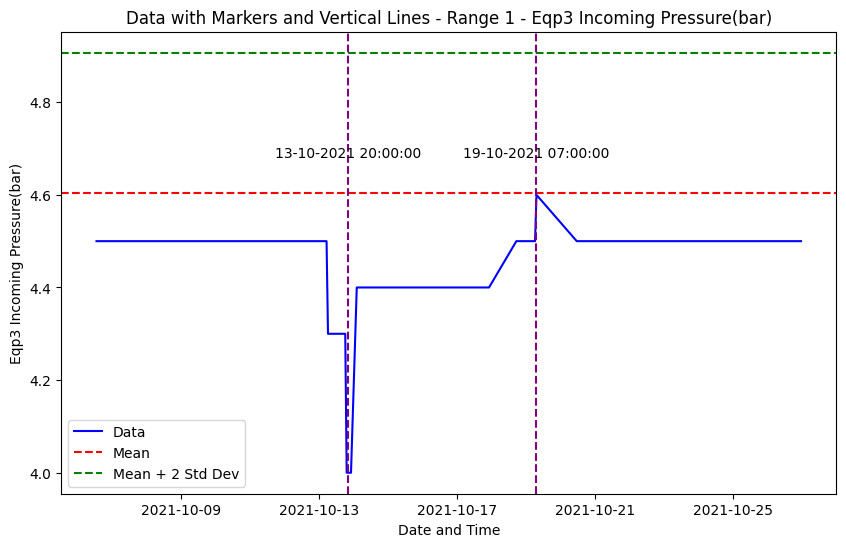

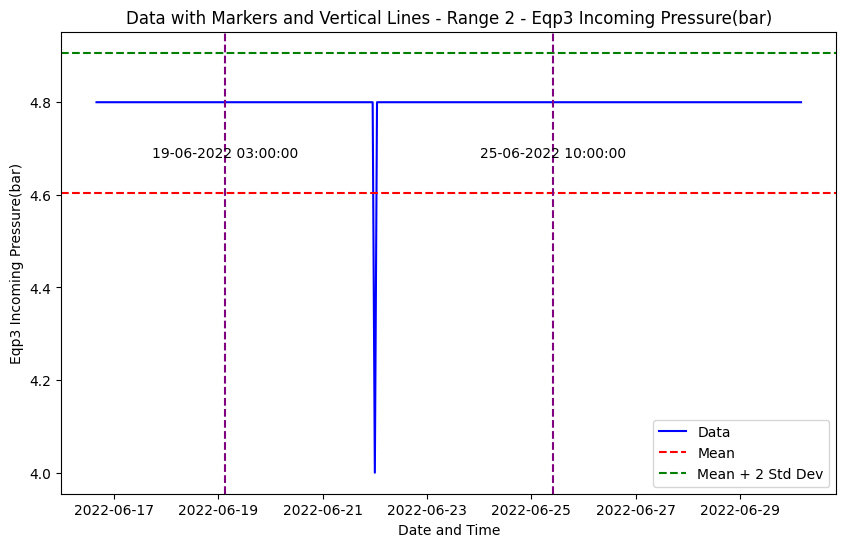

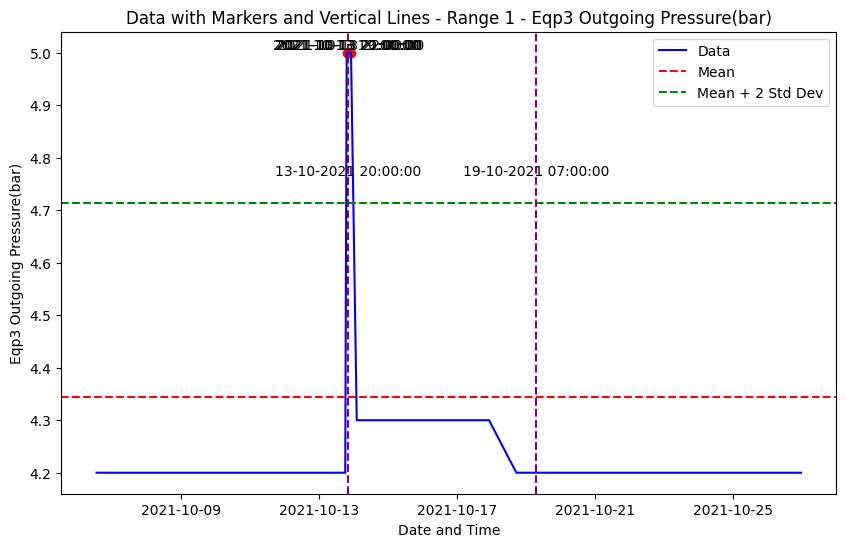

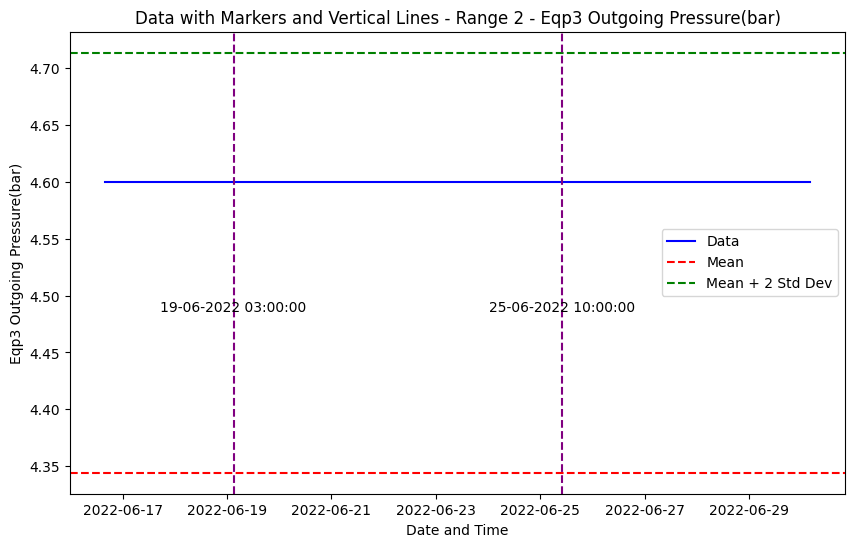

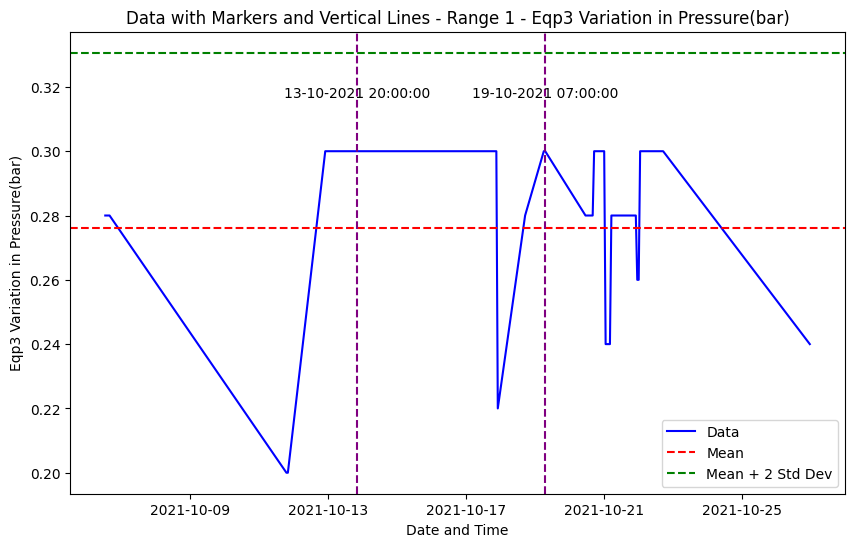

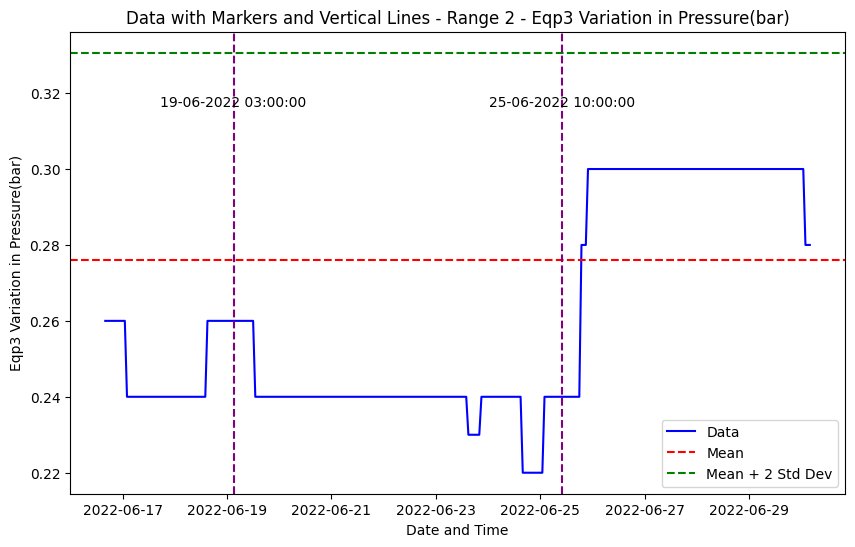

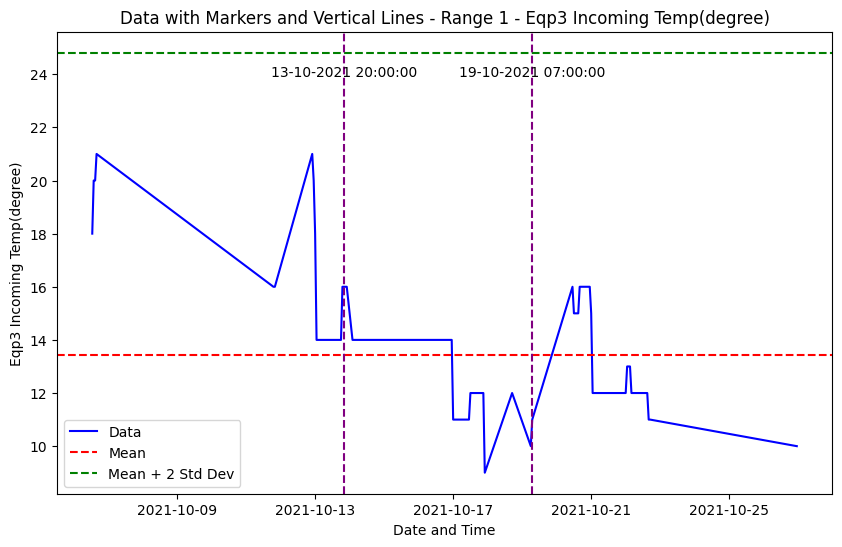

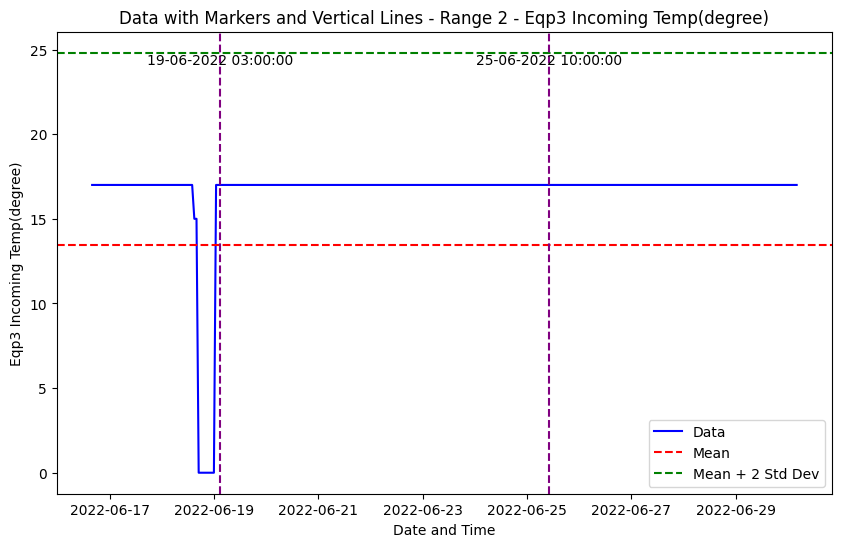

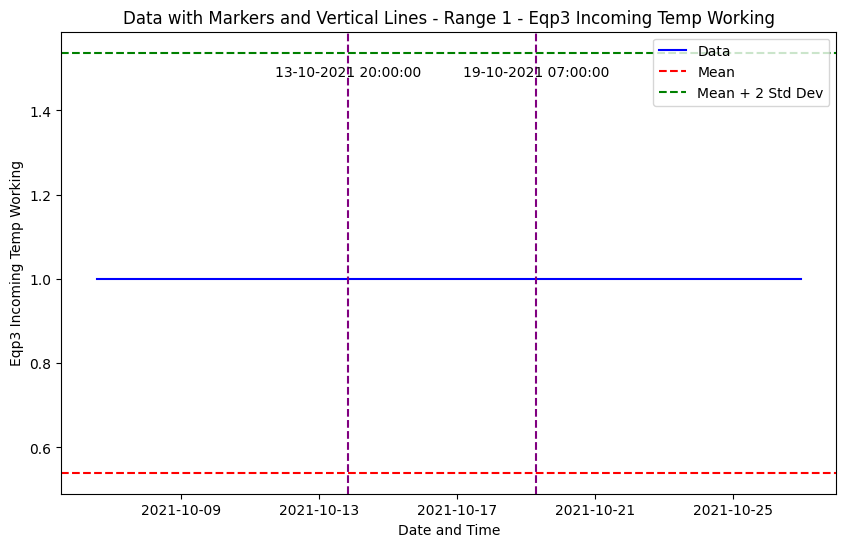

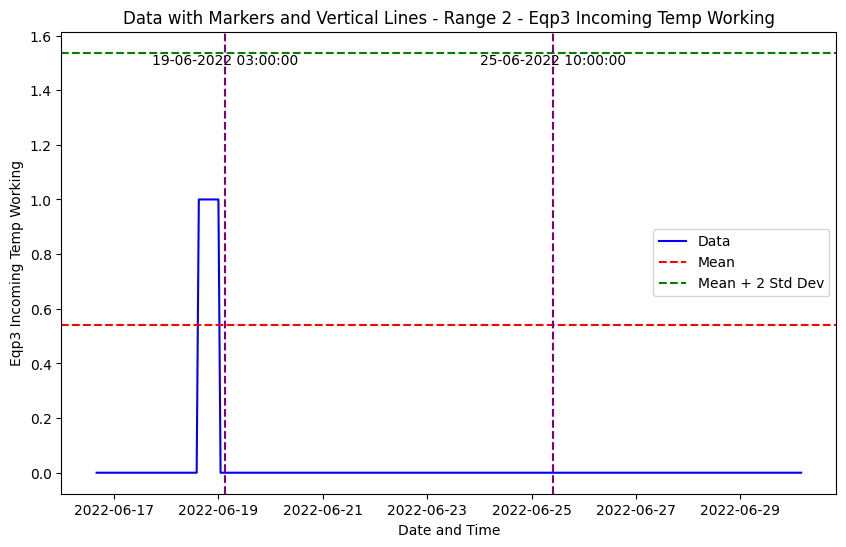

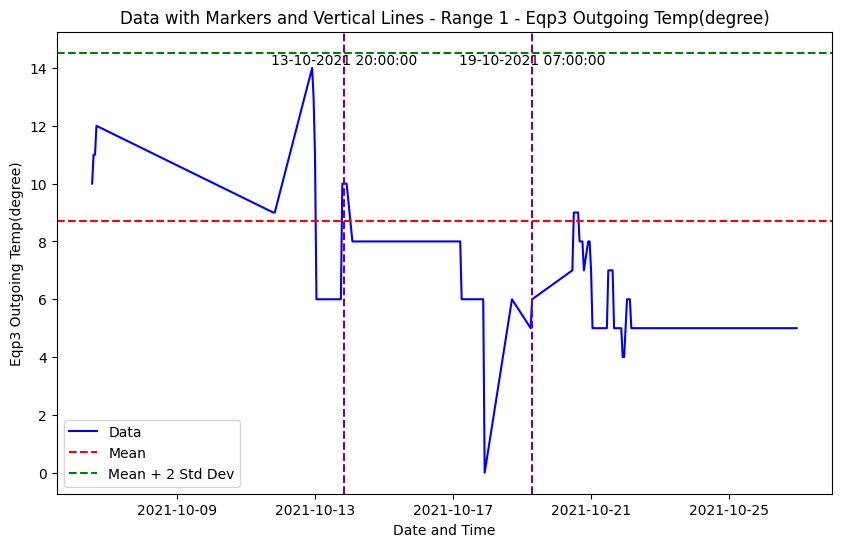

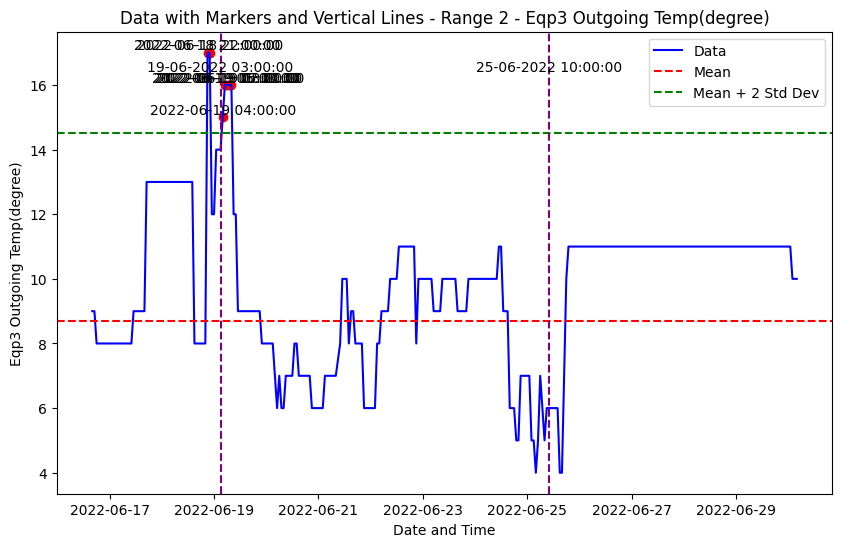

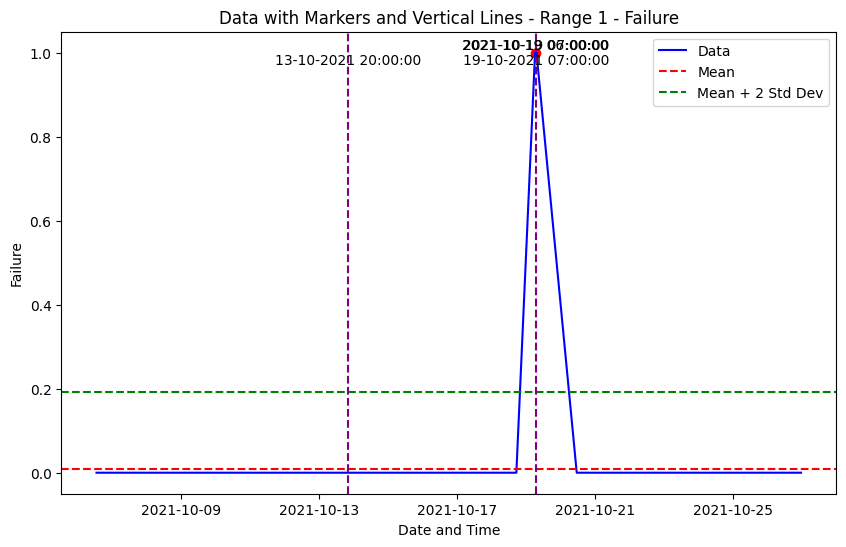

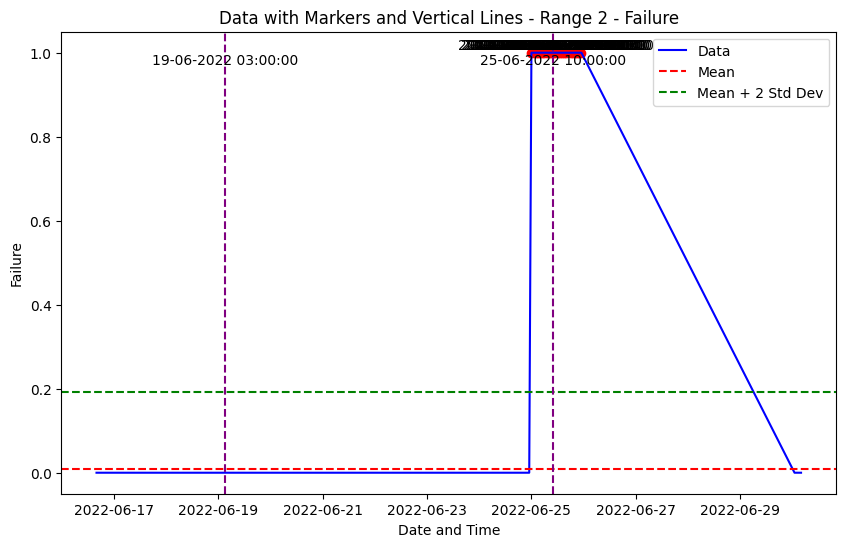

In [7]:
import matplotlib.pyplot as plt

# Set the time ranges
range1_start = pd.Timestamp('2021-10-06 13:00:00')
range1_end = pd.Timestamp('2021-10-26 23:00:00')

range2_start = pd.Timestamp('2022-06-16 16:00:00')
range2_end = pd.Timestamp('2022-06-30 04:00:00')

# Set the vertical line DateTime points and labels
range1_datetime_points = [pd.Timestamp('2021-10-13 20:00:00'), pd.Timestamp('2021-10-19 07:00:00')]
range1_datetime_labels = ['13-10-2021 20:00:00', '19-10-2021 07:00:00']

range2_datetime_points = [pd.Timestamp('2022-06-19 03:00:00'), pd.Timestamp('2022-06-25 10:00:00')]
range2_datetime_labels = ['19-06-2022 03:00:00', '25-06-2022 10:00:00']

# Loop through each column (parameter) in the DataFrame
for column in df2.columns:
    # Skip if the column is not numeric
    if not pd.api.types.is_numeric_dtype(df2[column]):
        continue
    
    # Filter the data based on the time ranges
    range1_data = df2.loc[(df2.index >= range1_start) & (df2.index <= range1_end)]
    range2_data = df2.loc[(df2.index >= range2_start) & (df2.index <= range2_end)]
    
    # Calculate mean and standard deviation for each range
    range1_mean = df2[column].mean()
    range1_std = df2[column].std()
    range2_mean = df2[column].mean()
    range2_std = df2[column].std()

    # Plot the line graph for Range 1
    plt.figure(figsize=(10, 6))
    plt.plot(range1_data.index, range1_data[column], color='blue', label='Data')
    plt.axhline(range1_mean, color='red', linestyle='--', label='Mean')
    plt.axhline(range1_mean + 2 * range1_std, color='green', linestyle='--', label='Mean + 2 Std Dev')
    plt.xlabel('Date and Time')
    plt.ylabel(column)
    plt.title(f'Data with Markers and Vertical Lines - Range 1 - {column}')
    plt.legend()

    # Add markers for values higher than mean + 2 * standard deviation
    range1_outliers = range1_data[range1_data[column] > (range1_mean + 2 * range1_std)]
    plt.scatter(range1_outliers.index, range1_outliers[column], color='red', marker='o', label='Outliers')

    # Print the individual DateTime indexes for each point in Range 1
    for index, row in range1_outliers.iterrows():
        plt.text(index, row[column], index.strftime('%Y-%m-%d %H:%M:%S'), ha='center', va='bottom')
    
    # Add vertical lines for DateTime points in Range 1
    for point, label in zip(range1_datetime_points, range1_datetime_labels):
        plt.axvline(point, color='purple', linestyle='--', label='Vertical Line')
        plt.text(point, plt.ylim()[1]*0.95, label, ha='center', va='top')

    plt.show()

    # Plot the line graph for Range 2
    plt.figure(figsize=(10, 6))
    plt.plot(range2_data.index, range2_data[column], color='blue', label='Data')
    plt.axhline(range2_mean, color='red', linestyle='--', label='Mean')
    plt.axhline(range2_mean + 2 * range2_std, color='green', linestyle='--', label='Mean + 2 Std Dev')
    plt.xlabel('Date and Time')
    plt.ylabel(column)
    plt.title(f'Data with Markers and Vertical Lines - Range 2 - {column}')
    plt.legend()

    # Add markers for values higher than mean + 2 * standard deviation
    range2_outliers = range2_data[range2_data[column] > (range2_mean + 2 * range2_std)]
    plt.scatter(range2_outliers.index, range2_outliers[column], color='red', marker='o', label='Outliers')

    # Print the individual DateTime indexes for each point in Range 2
    for index, row in range2_outliers.iterrows():
        plt.text(index, row[column], index.strftime('%Y-%m-%d %H:%M:%S'), ha='center', va='bottom')
    
    # Add vertical lines for DateTime points in Range 2
    for point, label in zip(range2_datetime_points, range2_datetime_labels):
        plt.axvline(point, color='purple', linestyle='--', label='Vertical Line')
        plt.text(point, plt.ylim()[1]*0.95, label, ha='center', va='top')

    plt.show()
